# Predictive Modeling and Analysis of Airfare trends & Ticket Pricing!

## Problem Statement:
The aviation industry in India is witnessing rapid growth, with multiple airlines operating flights across various cities. however the prices of air tickets are highly dynamic influenced by a multitude of factors such as demand timing airline reputation and more. For both airlines and passengers predicting these prices with accuracy is crucial for maximizing revenue and ensuring affordability.
 This projects into develop a robust mission learning model that accurately predicts the air tickets prices for flights within India by analysing data from different airlines and flight between various cities with the model will identify factors affecting ticket pricing and provide insights to enhance making processes for stockholders.


### Features

- **Airline**: The name of the airline.
- **Date_of_Journey**: The date of the journey.
- **Source**: The source from which the service begins.
- **Destination**: The destination where the service ends.
- **Route**: The route taken by the flight to reach the destination.
- **Dep_Time**: The time when the journey starts from the source.
- **Arrival_Time**: Time of arrival at the destination.
- **Duration**: Total duration of the flight.
- **Total_Stops**: Total stops between the source and destination.
- **Additional_Info**: Additional information about the flight.
- **Price**: The price of the ticket.


## Models Used

- **Random Forest Regressor**
- **XGB Regressor**
- **Linear Regression**
- **Decision Tree Regressor**
- **Support Vector Regressor (SVR)**

## Import libaries

In [865]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold


In [866]:
data=pd.read_excel('Data.xlsx')

In [867]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [868]:
data.shape

(10683, 11)

In [869]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [870]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Handling Duplicates

In [871]:
# Identify duplicates
duplicates = data.duplicated()
data[duplicates]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [872]:
data.duplicated().sum()

220

In [873]:
# Remove duplicate rows
data = data.drop_duplicates()
print("\nData After Removing Duplicates:")
data.head(5)


Data After Removing Duplicates:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [874]:
data.duplicated().sum()

0

## Treating the null values

In [875]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [876]:
# Missing percentage of data
data.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009557
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009557
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [877]:
data.dropna(inplace=True)

In [878]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [879]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [880]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [881]:
# Create a copy of the data to avoid the warning
data = data.copy()

# Convert Date_of_Journey to datetime format
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

# Extract day and month from Date_of_Journey
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month


# Drop the original Date_of_Journey column
data.drop(columns=['Date_of_Journey'], inplace=True)

In [882]:
# Specify the format for parsing the Dep_Time column
data['Dep_hour'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.minute

# Drop the original Dep_Time column
data.drop(columns=['Dep_Time'], inplace=True)


In [883]:
# Convert Arrival_Time to datetime format with flexible parsing
data['Arrival_datetime'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')

# Extract hour and minute from the parsed datetime
data['Arrival_hour'] = data['Arrival_datetime'].dt.hour
data['Arrival_min'] = data['Arrival_datetime'].dt.minute

# Drop the original Arrival_Time column and the temporary Arrival_datetime column
data.drop(columns=['Arrival_Time', 'Arrival_datetime'], inplace=True)


C:\Users\shank\AppData\Local\Temp\ipykernel_11612\1049800222.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_datetime'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')


In [884]:
# Convert a duration string in 'Xh Ym' format to total minutes.
def convert_duration_to_minutes(duration):
   
    hours = re.search(r'(\d+)h', duration)
    minutes = re.search(r'(\d+)m', duration)
    
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    
    return total_minutes

# Apply the function to the data DataFrame
data['Duration'] = data['Duration'].apply(convert_duration_to_minutes)

In [885]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [886]:
# Create a mapping dictionary for replacement
stops_mapping = {
    '1 stop': 1,
    'non-stop': 0,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

# Replace values using the mapping dictionary
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

In [887]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [888]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [889]:
# Replace 'No Info' with 'No info' in the Additional_Info column
data["Additional_Info"] = data["Additional_Info"].replace({'No Info': 'No info'})

In [890]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


### The values in the Additional_Info column by converting "No Info" to "No info", because both are same.

## Treating Outliers

In [891]:
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    UB = q3 + 1.5 * IQR
    LB = q1 - 1.5 * IQR
    return q1, q3, IQR, UB, LB

def outlierdetails(data):
    q1, q3, IQR, UB, LB = outlier(data)
    print('q1 is:', q1)
    print('q3 is:', q3)
    print('IQR is:', IQR)
    print('Upper Bound:', UB)
    print('Lower Bound:', LB)
    print("")
    print(data.describe())


In [892]:
outlierdetails(data['Duration'])


q1 is: 170.0
q3 is: 910.0
IQR is: 740.0
Upper Bound: 2020.0
Lower Bound: -940.0

count    10462.000000
mean       629.781591
std        500.699045
min          5.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration, dtype: float64


In [893]:
outlierdetails(data['Total_Stops'])

q1 is: 0.0
q3 is: 1.0
IQR is: 1.0
Upper Bound: 2.5
Lower Bound: -1.5

count    10462.000000
mean         0.802332
std          0.660609
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Total_Stops, dtype: float64


In [894]:
outlierdetails(data['Price'])


q1 is: 5224.0
q3 is: 12344.75
IQR is: 7120.75
Upper Bound: 23025.875
Lower Bound: -5457.125

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64


## Visualization

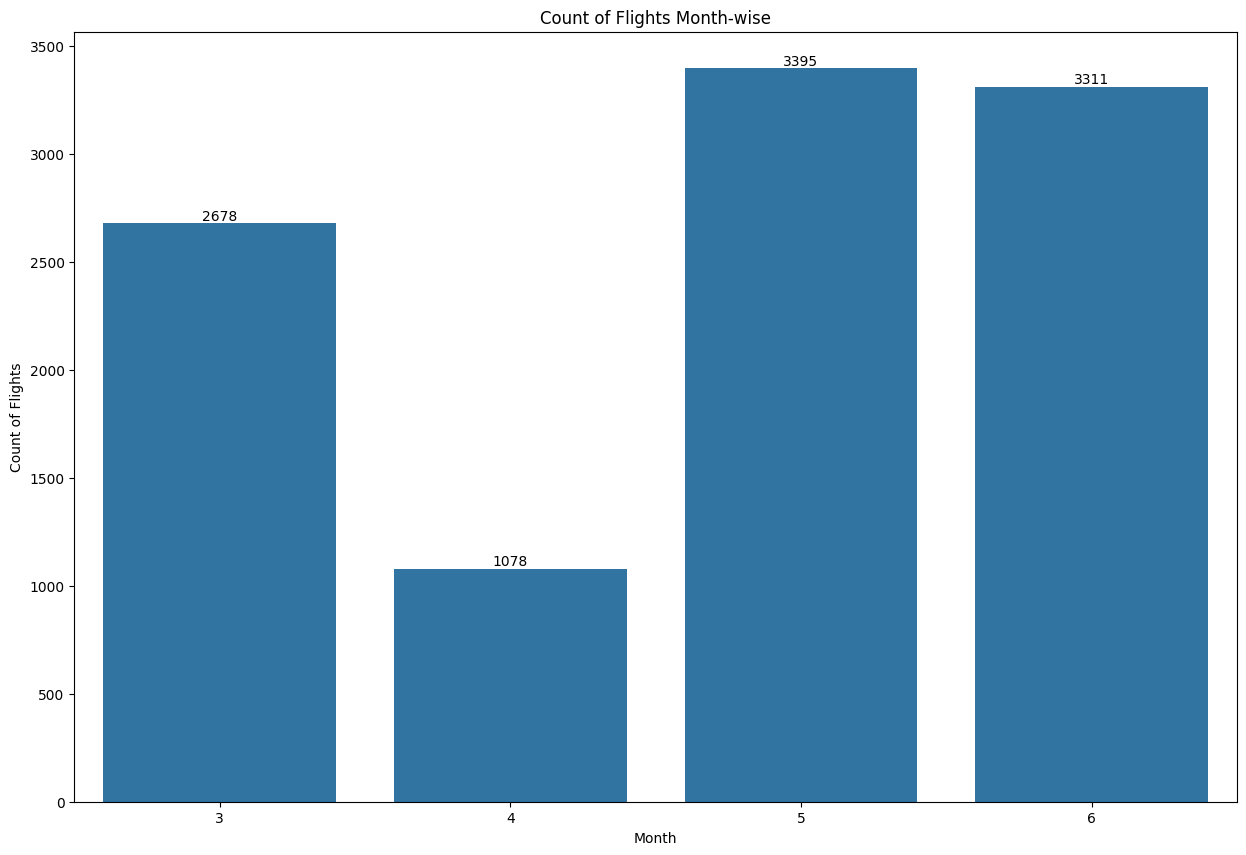

In [895]:
plt.figure(figsize=(15, 10))
plt.title('Count of Flights Month-wise')
ax = sns.countplot(x='Journey_month', data=data)
plt.xlabel('Month')
plt.ylabel('Count of Flights')
# Annotating each bar with the count value
for p in ax.patches:
    height = p.get_height()
    # Annotate the bar with its height
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom',
                color='black')
plt.show()

In [896]:
data["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

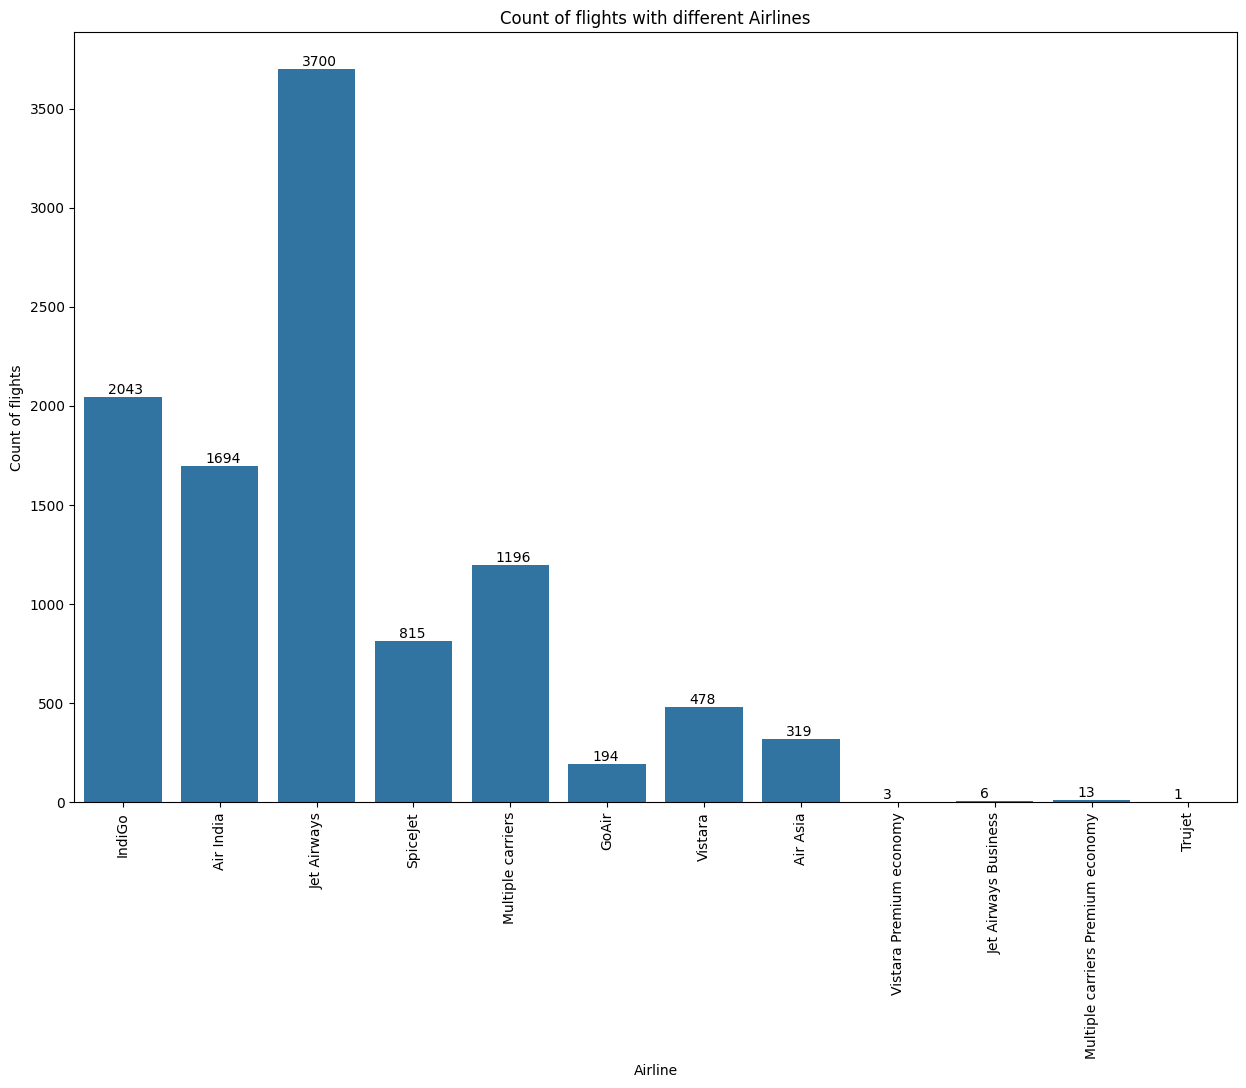

In [897]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

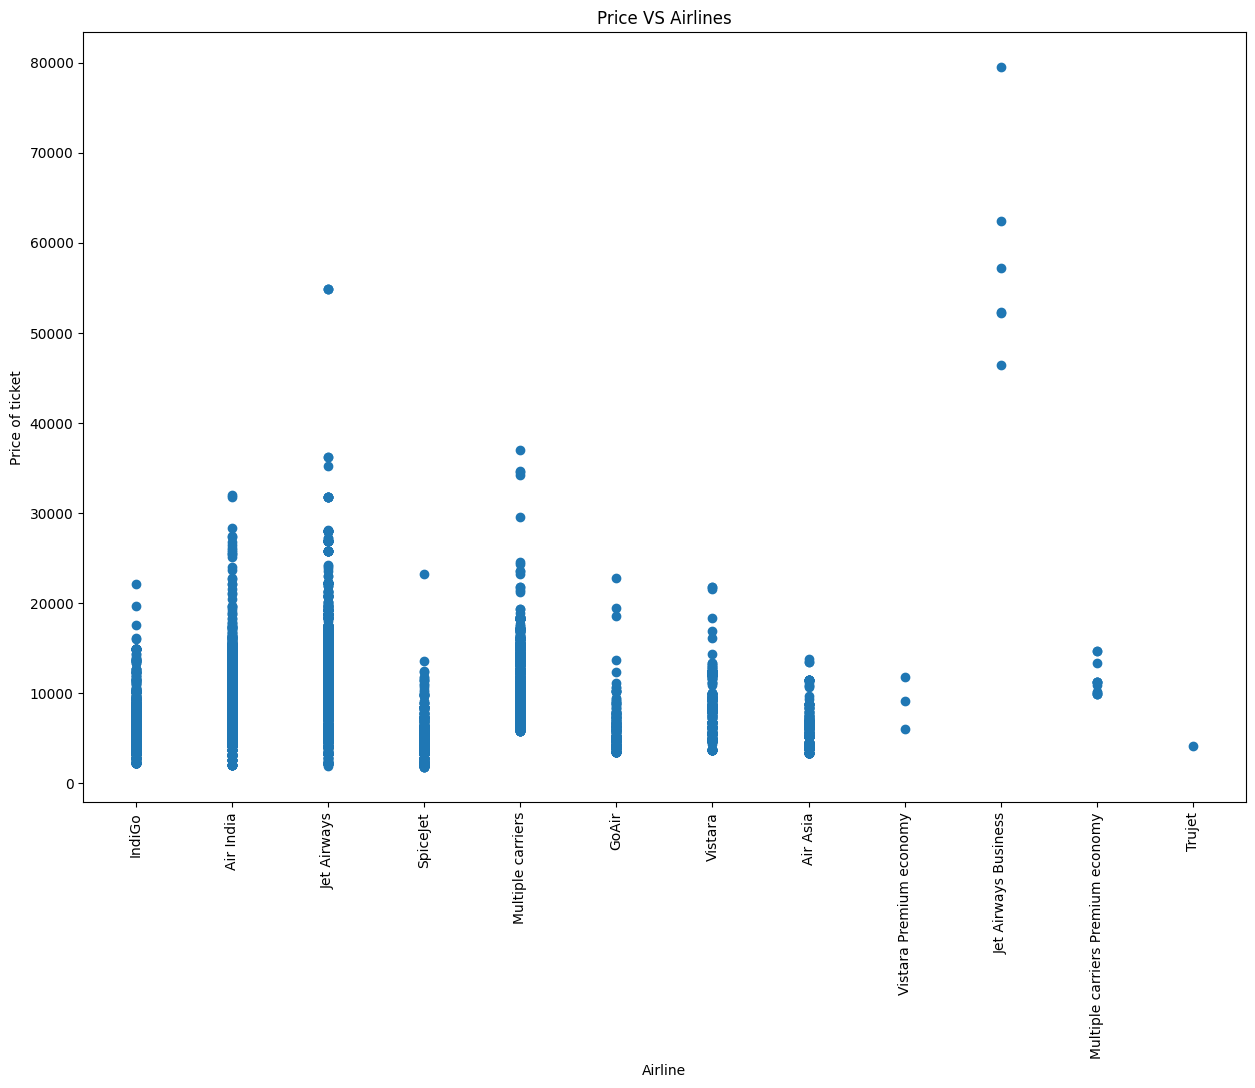

In [898]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

#### The ticket rate for Jet Airways Business airline is high.

Text(0, 0.5, 'Price of ticket')

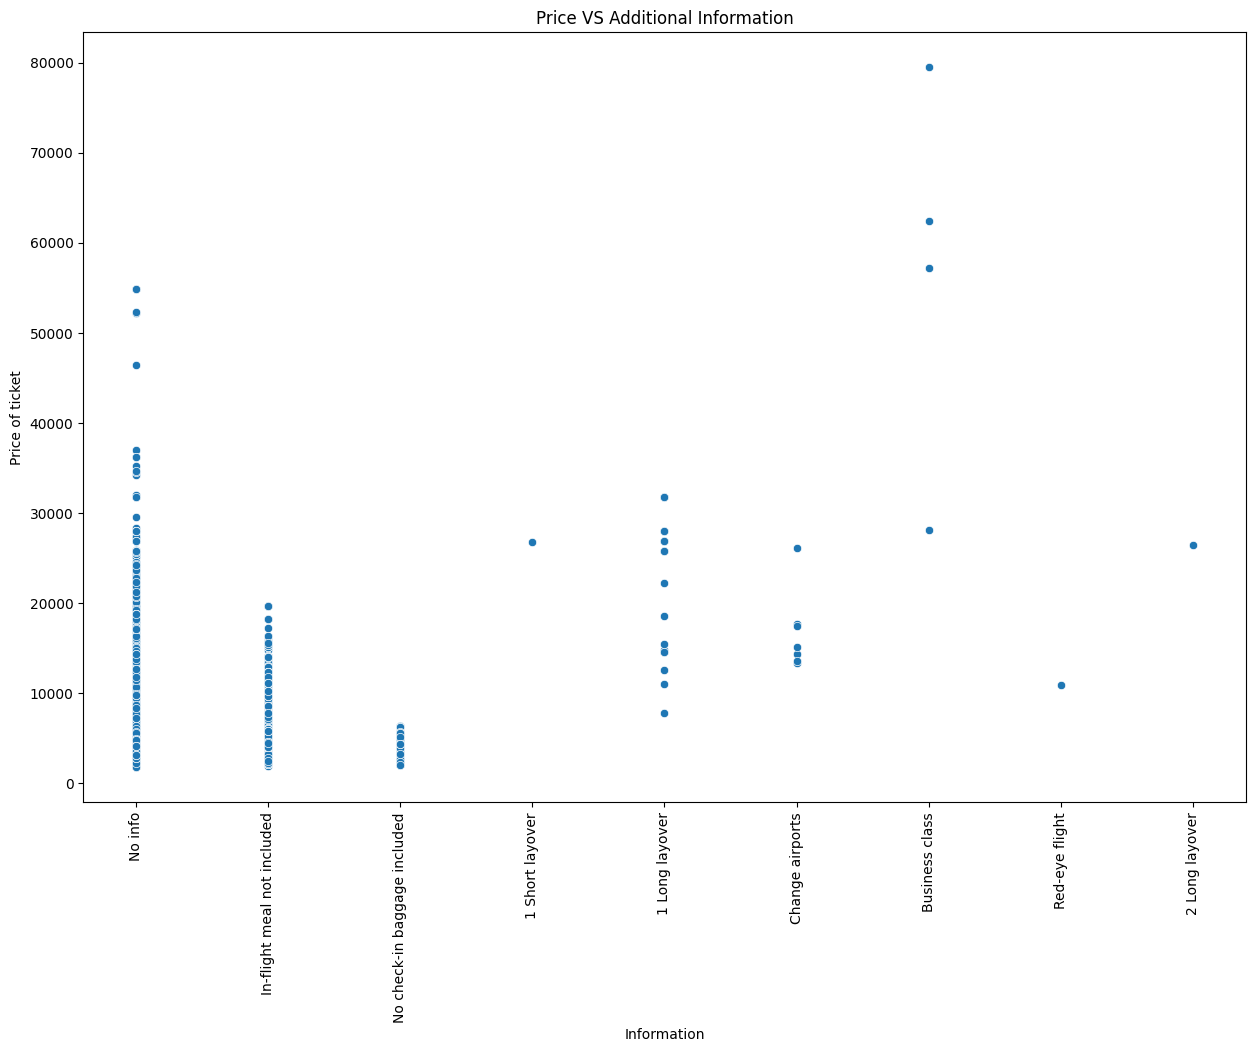

In [899]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(x='Additional_Info', y='Price', data=data)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

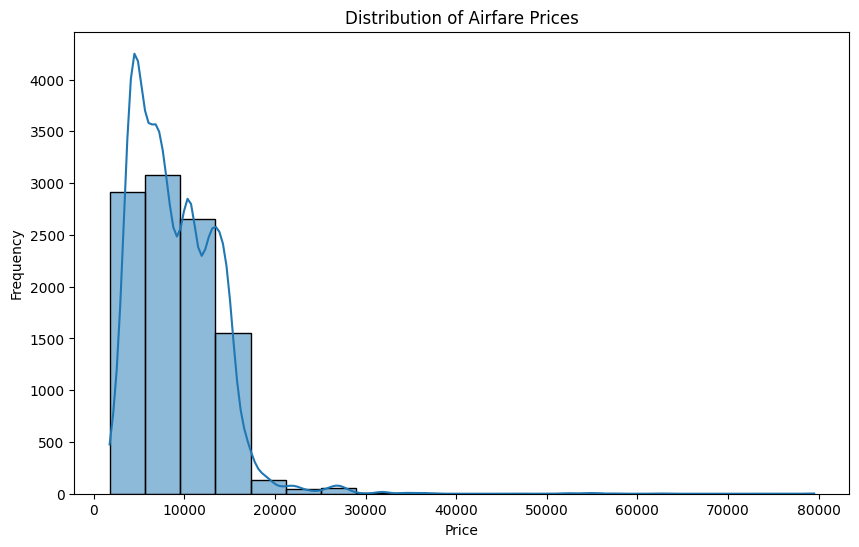

In [900]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Distribution of Airfare Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

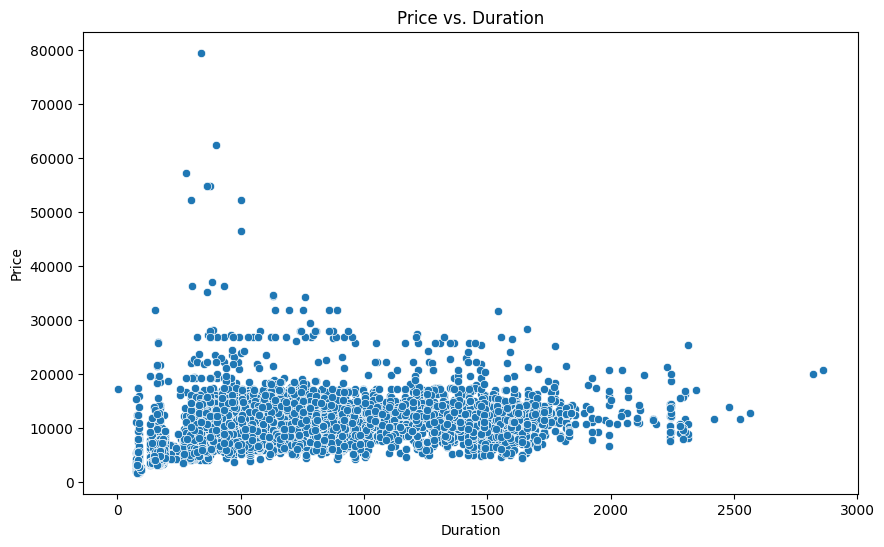

In [901]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=data)
plt.title('Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

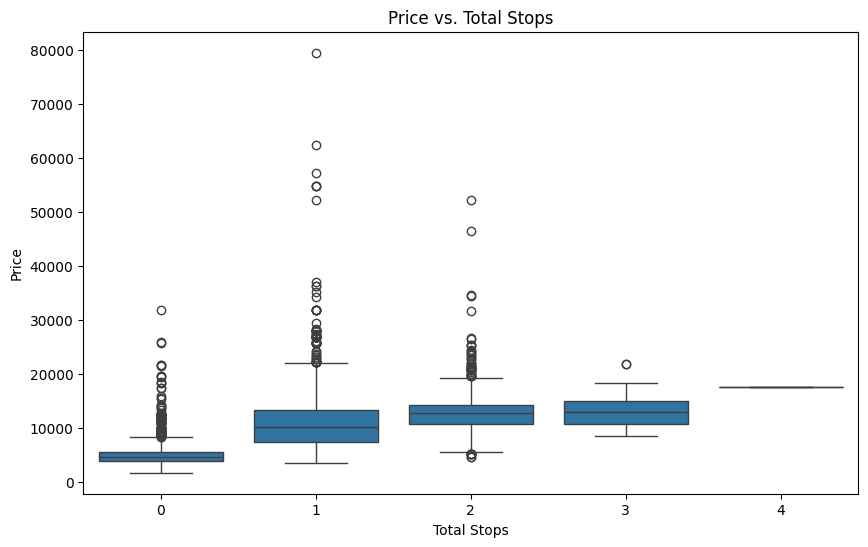

In [902]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Price vs. Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

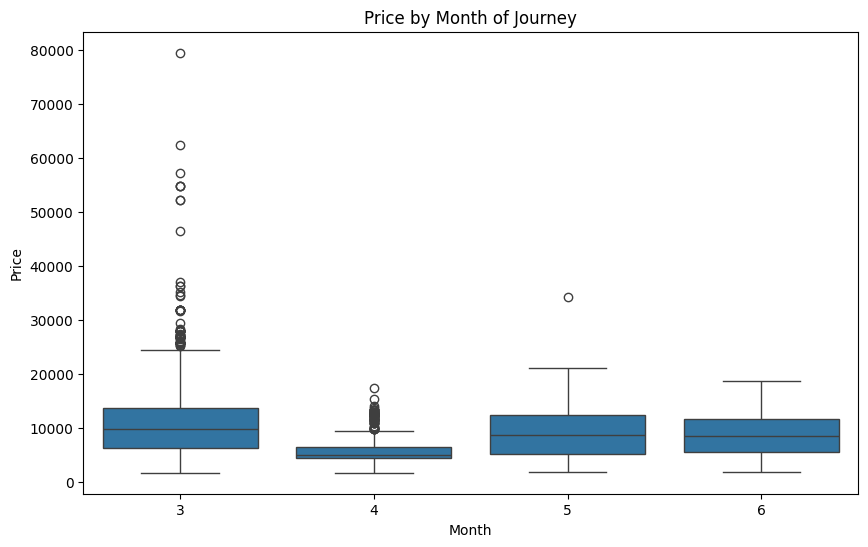

In [903]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_month', y='Price', data=data)
plt.title('Price by Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Number of Flights')

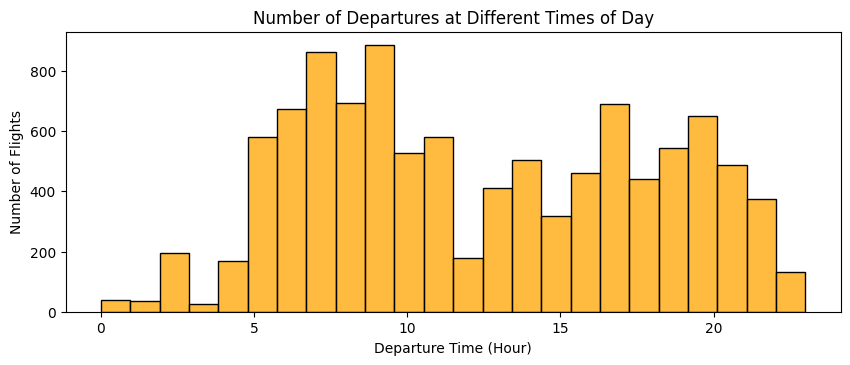

In [904]:
# Plotting Departure Times
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.histplot(data['Dep_hour'], bins=24, kde=False, color='orange')
plt.title('Number of Departures at Different Times of Day')
plt.xlabel('Departure Time (Hour)')
plt.ylabel('Number of Flights')

Text(0, 0.5, 'Number of Flights')

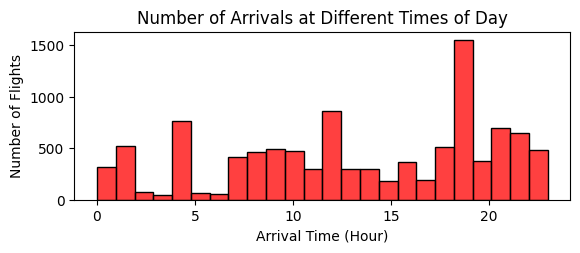

In [905]:
# Plotting Arrival Times
plt.subplot(2, 1, 2)
sns.histplot(data['Arrival_hour'].dropna(), bins=24, kde=False, color='red')
plt.title('Number of Arrivals at Different Times of Day')
plt.xlabel('Arrival Time (Hour)')
plt.ylabel('Number of Flights')

In [906]:
# Calculate average price by month
monthly_avg_price = data.groupby('Journey_month')['Price'].mean()

# Calculate average price by day of the week
weekday_avg_price = data.groupby('Journey_day')['Price'].mean()

print("Average Price by Month:")
print(monthly_avg_price)
print("\nAverage Price by Day:")
print('Journey day_avg_price')

Average Price by Month:
Journey_month
3    10695.397311
4     5766.545455
5     9029.239764
6     8736.152522
Name: Price, dtype: float64

Average Price by Day:
Journey day_avg_price


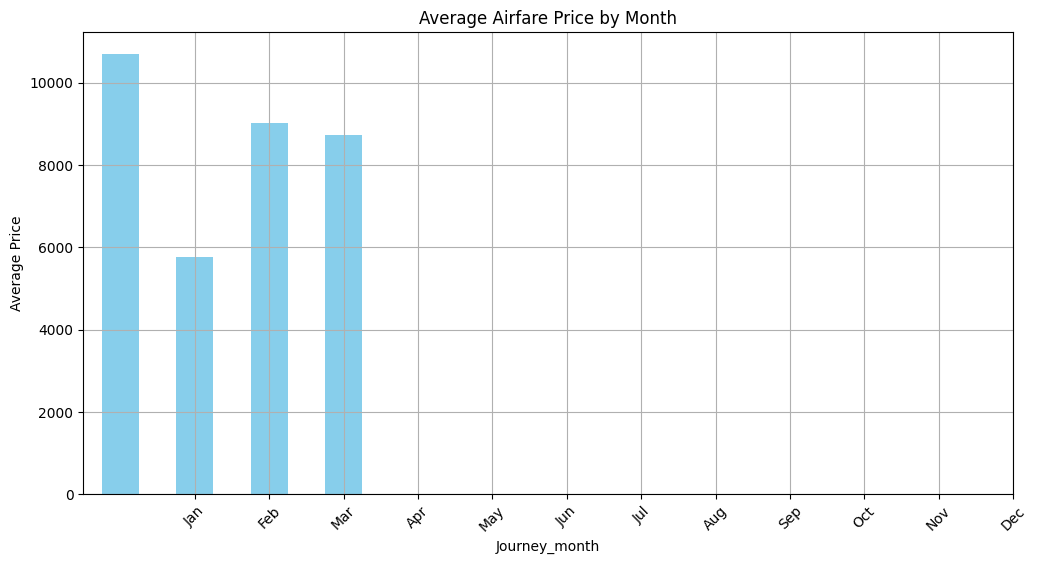

In [907]:
# Plot average price by month
plt.figure(figsize=(12, 6))
monthly_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Airfare Price by Month')
plt.xlabel('Journey_month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()


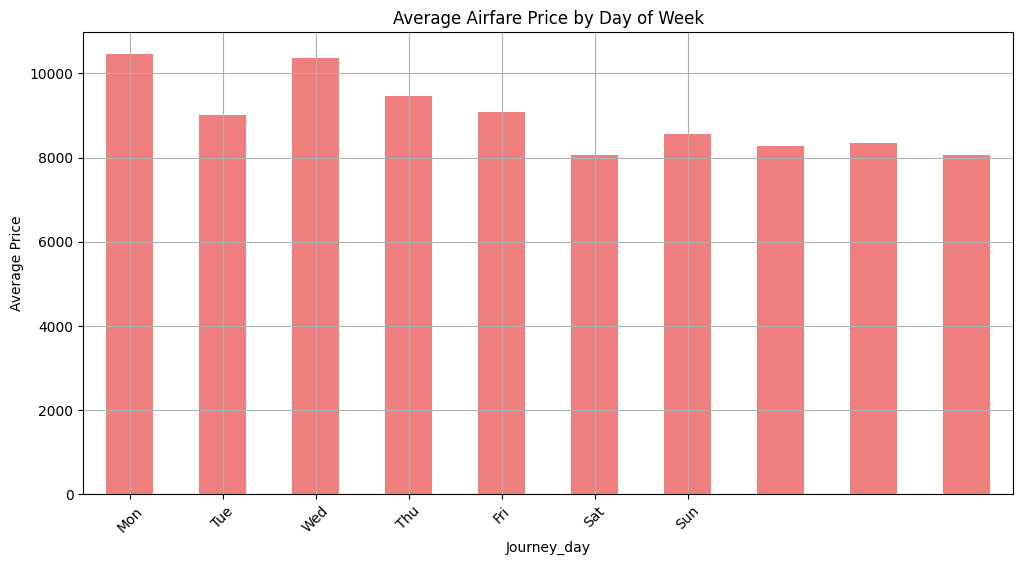

In [908]:
# Plot average price by day of week
plt.figure(figsize=(12, 6))
weekday_avg_price.plot(kind='bar', color='lightcoral')
plt.title('Average Airfare Price by Day of Week')
plt.xlabel('Journey_day')
plt.ylabel('Average Price')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(True)
plt.show()

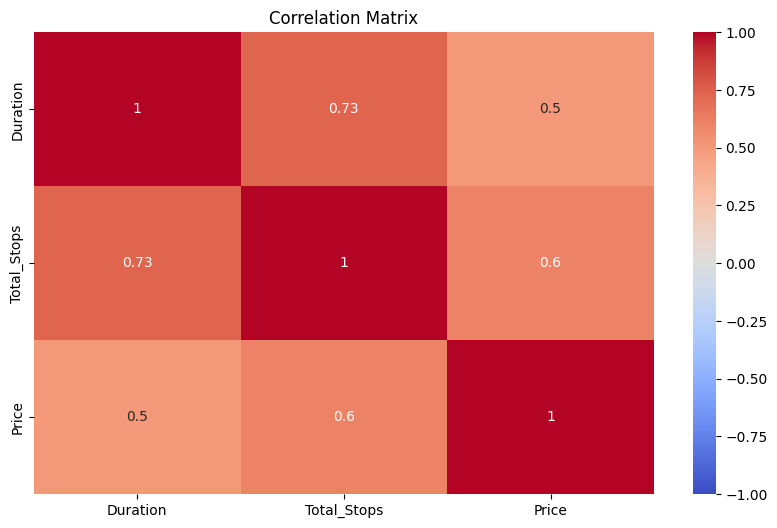

In [909]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Duration', 'Total_Stops', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [910]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [911]:
# split the data between dependent and independent variable
new_data= data.drop(['Price'],axis=1)
y=data['Price']

In [912]:
x

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,7,170,0,24,3,22,20,1,10
1,1,3,0,84,7,445,2,1,5,5,50,13,15
2,4,2,1,118,7,1140,2,9,6,9,25,4,25
3,3,3,0,91,7,325,1,12,5,18,5,23,30
4,3,0,5,29,7,285,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,7,150,0,9,4,19,55,22,25
10679,1,3,0,64,7,155,0,27,4,20,45,23,20
10680,4,0,2,18,7,180,0,27,4,8,20,11,20
10681,10,0,5,18,7,160,0,1,3,11,30,14,10


In [913]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [914]:
new_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration            int64
Total_Stops         int64
Additional_Info    object
Journey_day         int32
Journey_month       int32
Dep_hour            int32
Dep_min             int32
Arrival_hour        int32
Arrival_min         int32
dtype: object

In [915]:
new_data.nunique()

Airline             12
Source               5
Destination          6
Route              128
Duration           368
Total_Stops          5
Additional_Info      9
Journey_day         10
Journey_month        4
Dep_hour            24
Dep_min             12
Arrival_hour        24
Arrival_min         12
dtype: int64

In [916]:
# Select the categorical columns from new_data
new_categorical_data = new_data[['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']]

In [917]:
new_categorical_data

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info


In [918]:
# Select the numerical columns by dropping the categorical columns
new_numerical_data = new_data.drop(columns=['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'])

In [919]:
new_numerical_data

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,0,24,3,22,20,1,10
1,445,2,1,5,5,50,13,15
2,1140,2,9,6,9,25,4,25
3,325,1,12,5,18,5,23,30
4,285,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...
10678,150,0,9,4,19,55,22,25
10679,155,0,27,4,20,45,23,20
10680,180,0,27,4,8,20,11,20
10681,160,0,1,3,11,30,14,10


In [920]:
# Create a copy of new_categorical_data
new_categorical_data = new_categorical_data.copy()

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in new_categorical_data_copy.columns:
    new_categorical_data[column] = label_encoder.fit_transform(new_categorical_data[column])


In [921]:
new_categorical_data

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,7
1,1,3,0,84,7
2,4,2,1,118,7
3,3,3,0,91,7
4,3,0,5,29,7
...,...,...,...,...,...
10678,0,3,0,64,7
10679,1,3,0,64,7
10680,4,0,2,18,7
10681,10,0,5,18,7


In [922]:
# Concatenate both catagorical and numerical data
final_data = pd.concat([new_categorical_data, new_numerical_data], axis=1)

In [923]:
x = final_data

In [924]:
x

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,7,170,0,24,3,22,20,1,10
1,1,3,0,84,7,445,2,1,5,5,50,13,15
2,4,2,1,118,7,1140,2,9,6,9,25,4,25
3,3,3,0,91,7,325,1,12,5,18,5,23,30
4,3,0,5,29,7,285,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,7,150,0,9,4,19,55,22,25
10679,1,3,0,64,7,155,0,27,4,20,45,23,20
10680,4,0,2,18,7,180,0,27,4,8,20,11,20
10681,10,0,5,18,7,160,0,1,3,11,30,14,10


## Building Machine Learning Models

In [925]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [926]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50*'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
**************************************************
The size of testing input is (3139, 13)
The size of testing output is (3139,)


### Ridge

In [927]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [928]:
# Predict train result
y_train_pred =ridge_regressor.predict(X_train)

In [929]:
# Predict test result
y_test_pred =ridge_regressor.predict(X_test) 

In [930]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [931]:
print("Train Results for Ridge Regressor Model:")
print('-' * 50)
print(f"Root mean squared error: {sqrt(mean_squared_error(y_train.values, y_train_pred))}")
print(f"Mean absolute % error: {round(mean_absolute_percentage_error(y_train.values, y_train_pred))}")
print(f"R-squared: {r2_score(y_train.values, y_train_pred)}")

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error: 3501.0566455685266
Mean absolute % error: 32
R-squared: 0.43383898557795375


In [932]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3405.9569115792283
Mean absolute % error:  32
R-squared:  0.44143812635823987


### Lasso

In [933]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [934]:
# Predict train result
y_train_pred =lasso_regressor.predict(X_train) 


In [935]:
#Predict test result
y_test_pred =lasso_regressor.predict(X_test) 

In [936]:
print("Train Results for Lasso Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_train, y_train_pred):.4f}")

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 3512.4033
Mean Absolute Percentage Error: 3184.37%
R-squared Score: 0.4302


In [937]:
print("Test Results for Lasso Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_test, y_test_pred):.4f}")

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 3410.4047
Mean Absolute Percentage Error: 3218.01%
R-squared Score: 0.4400


### K Neighbors Regressor

In [938]:
k_range = list(range(1, 30))
params = {'n_neighbors': k_range}
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv=10, scoring='neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [939]:
print("Best parameters found:", knn_regressor.best_params_)
print("Best score (negative MSE) found:", knn_regressor.best_score_)

Best parameters found: {'n_neighbors': 4}
Best score (negative MSE) found: -9569164.25418153


In [940]:
y_train_pred =knn_regressor.predict(X_train) 

In [941]:
y_test_pred =knn_regressor.predict(X_test) 

In [942]:
print("Train Results for KNN Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_train, y_train_pred):.4f}")

Train Results for KNN Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 2320.9602
Mean Absolute Percentage Error: 1388.92%
R-squared Score: 0.7512


### Decision Tree Regressor

In [943]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [944]:
depth_range = list(range(3, 30))
param_grid = {'max_depth': depth_range}
tree_regressor = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [945]:
print("Best parameters found:", tree_regressor.best_params_)
print("Best score (negative MSE) found:", tree_regressor.best_score_)

Best parameters found: {'max_depth': 26}
Best score (negative MSE) found: 0.7861044970524107


In [946]:
y_train_pred =tree.predict(X_train) 
y_test_pred =tree.predict(X_test) 

In [947]:
print("Train Results for Decision Tree Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_train, y_train_pred):.4f}")

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 489.3970
Mean Absolute Percentage Error: 247.55%
R-squared Score: 0.9889


In [948]:
print("Test Results for Decision Tree Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_test, y_test_pred):.4f}")

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 2188.1103
Mean Absolute Percentage Error: 902.81%
R-squared Score: 0.7695


### Random Forest Regressor

In [949]:
# Define the parameter grid for tuning
tuned_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_regressor = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=tuned_params,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=42  # Optional: For reproducibility
)
random_regressor.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [950]:
print("Best parameters found:", random_regressor.best_params_)
print("Best score (negative MAE) found:", random_regressor.best_score_)

Best parameters found: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best score (negative MAE) found: -723.3832745488187


In [951]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [952]:
print("Train Results for Random Forest Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_train, y_train_pred):.4f}")

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 656.8562
Mean Absolute Percentage Error: 292.30%
R-squared Score: 0.9801


In [953]:
print("Test Results for Random Forest Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_test, y_test_pred):.4f}")

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 1505.4809
Mean Absolute Percentage Error: 787.98%
R-squared Score: 0.8909


### XGB Regressor

In [954]:
tuned_params = {
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500],
    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
}
model = RandomizedSearchCV(
    XGBRegressor(),
    param_distributions=tuned_params,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=42  # Optional: For reproducibility
)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [955]:
print("Best parameters found:", model.best_params_)
print("Best score (negative MAE) found:", model.best_score_)

Best parameters found: {'reg_lambda': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
Best score (negative MAE) found: -952.6363044574425


In [956]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [957]:
print("Train Results for XGBoost Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_train, y_train_pred):.4f}")

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 1225.1876
Mean Absolute Percentage Error: 945.85%
R-squared Score: 0.9307


In [958]:
print("Test Results for XGBoost Regressor Model:")
print("-" * 50)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred) * 100:.2f}%")
print(f"R-squared Score: {r2_score(y_test, y_test_pred):.4f}")

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root Mean Squared Error: 1527.9694
Mean Absolute Percentage Error: 1081.57%
R-squared Score: 0.8876


## The highest accuracy results are obtained using the Random Forest Regressor and XGB Regressor compared to other regression methods.

## Conclusion

This project demonstrates the effectiveness of ensemble methods like Random Forest and XGBoost in predicting airfare prices with high accuracy. Future work could include hyperparameter tuning, feature engineering, and incorporating additional data sources to further improve the predictions.